<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220430.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* pandas functions 
* dt

In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
from datetime import datetime, date, time, timezone, timedelta

# pandas functions

In [ ]:
list_file = [f'players_{a:02d}.csv' for a in range(15,22)]
d1 = pd.concat(map(pd.read_csv, list_file))
d1.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,27.0,1987-06-24,169.0,67.0,Argentina,FC Barcelona,...,62+3,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29.0,1985-02-05,185.0,80.0,Portugal,Real Madrid,...,63+3,63+3,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3
2,9014,https://sofifa.com/player/9014/arjen-robben/15...,A. Robben,Arjen Robben,30.0,1984-01-23,180.0,80.0,Netherlands,FC Bayern München,...,64+3,64+3,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3
3,41236,https://sofifa.com/player/41236/zlatan-ibrahim...,Z. Ibrahimović,Zlatan Ibrahimović,32.0,1981-10-03,195.0,95.0,Sweden,Paris Saint-Germain,...,61+3,65+3,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3
4,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,28.0,1986-03-27,193.0,92.0,Germany,FC Bayern München,...,36+3,40+3,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3


In [ ]:
top_nans = pd.DataFrame(d1.isnull().sum()[d1.isnull().sum() != 0], columns = ['nans']).nlargest(5, 'nans')
top_nans 


,nans
loaned_from,113250
nation_position,112732
nation_jersey_number,112732
player_tags,110550
gk_diving,107235


In [ ]:
d1[top_nans.index].fillna(d1.mode().iloc[1]).head()

,loaned_from,nation_position,nation_jersey_number,player_tags,gk_diving
0,NaN,CF,10.0,"#Speedster, #Dribbler, #FK Specialist, #Acroba...",NaN
1,NaN,LW,7.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",NaN
2,NaN,RS,11.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",NaN
3,NaN,ST,10.0,"#Poacher, #Aerial Threat, #Distance Shooter, #...",NaN
4,NaN,GK,1.0,NaN,87.0


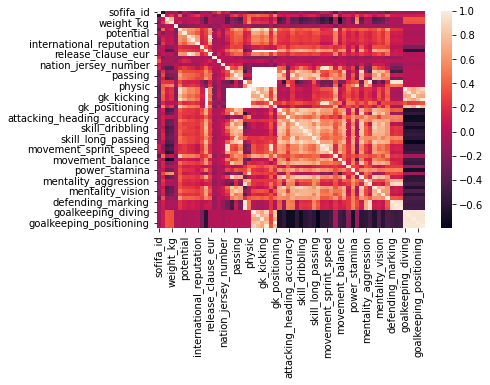

In [ ]:
sns.heatmap(d1.corr())

In [ ]:
d1.mask(cond = ~d1.age.between(10, 30), other = np.nan)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023.0,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,27.0,1987-06-24,169.0,67.0,Argentina,FC Barcelona,...,62+3,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3
1,20801.0,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29.0,1985-02-05,185.0,80.0,Portugal,Real Madrid,...,63+3,63+3,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3
2,9014.0,https://sofifa.com/player/9014/arjen-robben/15...,A. Robben,Arjen Robben,30.0,1984-01-23,180.0,80.0,Netherlands,FC Bayern München,...,64+3,64+3,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,167495.0,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,28.0,1986-03-27,193.0,92.0,Germany,FC Bayern München,...,36+3,40+3,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18024,255837.0,https://sofifa.com/player/255837/nader-al-shar...,N. Al Sharari,Nader Abdullah Al Sharari,24.0,1996-05-08,184.0,75.0,Saudi Arabia,Abha Club,...,45+2,45+2,45+2,45+2,45+2,48+2,54+2,54+2,54+2,48+2
18025,255851.0,https://sofifa.com/player/255851/koki-tachi/21...,K. Tachi,Koki Tachi,22.0,1997-12-14,173.0,73.0,Japan,Shonan Bellmare,...,51+2,50+2,50+2,50+2,51+2,52+2,54+2,54+2,54+2,52+2
18026,256192.0,https://sofifa.com/player/256192/edgar-jose-si...,E. Silva,Edgar José Silva Infante,22.0,1998-02-12,174.0,69.0,Venezuela,Caracas FC,...,48+2,47+2,47+2,47+2,48+2,46+2,39+2,39+2,39+2,46+2
18027,257900.0,https://sofifa.com/player/257900/sigitas-olber...,S. Olberkis,Sigitas Olberkis,23.0,1997-04-19,192.0,88.0,Lithuania,Sligo Rovers,...,46+2,47+2,47+2,47+2,46+2,48+2,54+2,54+2,54+2,48+2


In [ ]:
d1.age.idxmax(), d1.age.idxmin()

(16065, 3493)

In [ ]:
d1.age.argsort(kind = 'mergesort')

0          3493
1          5528
2         11276
3         11821
4         12488
          ...  
18024     31777
18025     70143
18026     65812
18027    118447
18028        -1
Name: age, Length: 120411, dtype: int64

In [ ]:
d1.groupby('nationality').nth(1)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,club_name,league_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
nationality,,,,,,,,,,,,,,,,,,,,,
Afghanistan,240750,https://sofifa.com/player/240750/sharif-mukham...,S. Mukhammad,Sharif Mukhammad,27.0,1990-03-21,184.0,72.0,AFC Eskilstuna,Swedish Allsvenskan,...,56+1,58+1,58+1,58+1,56+1,54+1,53+1,53+1,53+1,54+1
Albania,189296,https://sofifa.com/player/189296/etrit-berisha...,E. Berisha,Etrit Berisha,25.0,1989-03-10,194.0,92.0,Lazio,Italian Serie A,...,29+0,31+0,31+0,31+0,29+0,29+0,32+0,32+0,32+0,29+0
Algeria,184267,https://sofifa.com/player/184267/yacine-brahim...,Y. Brahimi,Yacine Brahimi,24.0,1990-02-08,175.0,66.0,FC Porto,Portuguese Liga ZON SAGRES,...,62+0,62+0,62+0,62+0,62+0,54+0,48+0,48+0,48+0,54+0
Andorra,192937,https://sofifa.com/player/192937/marc-vales-go...,Marc Vales,Marc Vales González,30.0,1990-04-04,184.0,79.0,Sandefjord Fotball,Norwegian Eliteserien,...,58+2,58+2,58+2,58+2,58+2,59+2,62+0,62+0,62+0,59+2
Angola,184823,https://sofifa.com/player/184823/djalma-braume...,Djalma,Djalma Braume Manuel Abel Campos,27.0,1987-05-30,176.0,72.0,Atiker Konyaspor,Turkish Süper Lig,...,58+0,57+0,57+0,57+0,58+0,55+0,51+0,51+0,51+0,55+0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,189250,https://sofifa.com/player/189250/salomon-rondo...,S. Rondón,José Salomón Rondón Giménez,24.0,1989-09-16,189.0,85.0,Zenit St. Petersburg,Russian Premier League,...,52+0,53+0,53+0,53+0,52+0,50+0,51+0,51+0,51+0,50+0
Vietnam,244699,https://sofifa.com/player/244699/cong-phuong-n...,Nguyen Cong Phuong,Công Phượng Nguyễn,24.0,1995-01-21,168.0,65.0,Sint-Truidense VV,Belgian Jupiler Pro League,...,41+2,38+2,38+2,38+2,41+2,38+2,33+2,33+2,33+2,38+2
Wales,186561,https://sofifa.com/player/186561/aaron-ramsey/...,A. Ramsey,Aaron Ramsey,23.0,1990-12-26,177.0,70.0,Arsenal,English Premier League,...,77+1,78+1,78+1,78+1,77+1,74+1,71+1,71+1,71+1,74+1


# dt

In [ ]:
d2  = pd.DataFrame({'user_id' : range(1, 7), 
                    'purchase_date' : ["2015-01-23 14:05:21", "2015-02-05 05:07:30", 
                                       "2015-02-18 17:08:51", "2015-03-21 17:07:30", 
                                       "2015-03-11 18:32:56", "2015-03-03 11:02:30"]})

d2.purchase_date = pd.to_datetime(d2.purchase_date)
d2

,user_id,purchase_date
0,1,2015-01-23 14:05:21
1,2,2015-02-05 05:07:30
2,3,2015-02-18 17:08:51
3,4,2015-03-21 17:07:30
4,5,2015-03-11 18:32:56
5,6,2015-03-03 11:02:30


In [ ]:
d2.assign(month = d2.purchase_date.to_numpy().astype('datetime64[M]'))

,user_id,purchase_date,month
0,1,2015-01-23 14:05:21,2015-01-01
1,2,2015-02-05 05:07:30,2015-02-01
2,3,2015-02-18 17:08:51,2015-02-01
3,4,2015-03-21 17:07:30,2015-03-01
4,5,2015-03-11 18:32:56,2015-03-01
5,6,2015-03-03 11:02:30,2015-03-01


In [ ]:
d2.assign(month = d2.purchase_date.dt.to_period('M').dt.to_timestamp())

,user_id,purchase_date,month
0,1,2015-01-23 14:05:21,2015-01-01
1,2,2015-02-05 05:07:30,2015-02-01
2,3,2015-02-18 17:08:51,2015-02-01
3,4,2015-03-21 17:07:30,2015-03-01
4,5,2015-03-11 18:32:56,2015-03-01
5,6,2015-03-03 11:02:30,2015-03-01


In [ ]:
d2.assign(month = d2.purchase_date.dt.floor('D') - pd.offsets.MonthBegin())

,user_id,purchase_date,month
0,1,2015-01-23 14:05:21,2015-01-01
1,2,2015-02-05 05:07:30,2015-02-01
2,3,2015-02-18 17:08:51,2015-02-01
3,4,2015-03-21 17:07:30,2015-03-01
4,5,2015-03-11 18:32:56,2015-03-01
5,6,2015-03-03 11:02:30,2015-03-01


In [ ]:
d2.purchase_date.apply(lambda x : x.strftime('%Y-01-01'))

0    2015-01-01
1    2015-01-01
2    2015-01-01
3    2015-01-01
4    2015-01-01
5    2015-01-01
Name: purchase_date, dtype: object

In [ ]:
a = "d2.assign(month = d2.purchase_date.to_numpy().astype('datetime64[M]'))"
b = "d2.assign(month = d2.purchase_date.dt.to_period('M').dt.to_timestamp())"
c = "d2.assign(month = d2.purchase_date.dt.floor('D') - pd.offsets.MonthBegin())"
d = "d2.assign(month = d2.purchase_date.apply(lambda x : x.strftime('%Y-01-01')))"
txts = [a, b, c, d]

timers = []

for line in txts :
  print('START : ' + line) 
   
  temp = []

  for x in range(10000) :
    s_time = datetime.now()
    eval(line)
    e_time = datetime.now()  
    t_time = e_time - s_time
    temp.append(t_time)

  timers.append(np.mean(temp))

timers

START : d2.assign(month = d2.purchase_date.to_numpy().astype('datetime64[M]'))
START : d2.assign(month = d2.purchase_date.dt.to_period('M').dt.to_timestamp())
START : d2.assign(month = d2.purchase_date.dt.floor('D') - pd.offsets.MonthBegin())
START : d2.assign(month = d2.purchase_date.apply(lambda x : x.strftime('%Y-01-01')))


[datetime.timedelta(microseconds=619),
 datetime.timedelta(microseconds=1399),
 datetime.timedelta(microseconds=1240),
 datetime.timedelta(microseconds=911)]

In [ ]:
names = ['numpy_astype', 'toperiod_timestamp', 'floor_offset', 'strftime']
res = pd.DataFrame({'txt' : names, 'time' : timers})
res

,txt,time
0,numpy_astype,0 days 00:00:00.000619
1,toperiod_timestamp,0 days 00:00:00.001399
2,floor_offset,0 days 00:00:00.001240
3,strftime,0 days 00:00:00.000911


In [ ]:
import plotnine as gg
from plotnine import aes, ggplot

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/scales/scale.py:611: PlotnineWarning: You have changed the transform of a specialised scale. The result may not be what you expect.
Original transform: pd_timedelta
New transform: pd_timedel
  PlotnineWarning


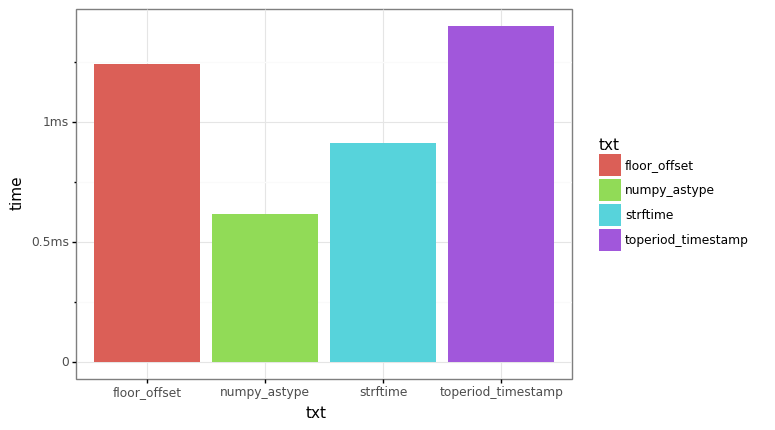

<ggplot: (8758676624257)>

In [ ]:
(
    ggplot(res, aes('txt', 'time', fill = 'txt')) +
    gg.geom_col() +
    gg.theme_bw()
)

In [ ]:
d2

,user_id,purchase_date
0,1,2015-01-23 14:05:21
1,2,2015-02-05 05:07:30
2,3,2015-02-18 17:08:51
3,4,2015-03-21 17:07:30
4,5,2015-03-11 18:32:56
5,6,2015-03-03 11:02:30


In [ ]:
d3 = pd.DataFrame({'user_id' : range(30000), 'purchase_date' : pd.date_range('2015-01-01', periods = 30000, freq = 'S')})

In [ ]:
a = "d3.assign(month = d3.purchase_date.to_numpy().astype('datetime64[M]'))"
b = "d3.assign(month = d3.purchase_date.dt.to_period('M').dt.to_timestamp())"
c = "d3.assign(month = d3.purchase_date.dt.floor('D') - pd.offsets.MonthBegin())"
d = "d3.assign(month = d3.purchase_date.apply(lambda x : x.strftime('%Y-01-01')))"
txts = [a, b, c, d]

timers = []

for line in txts :
  print('START : ' + line) 
   
  temp = []

  for x in range(10000) :
    s_time = datetime.now()
    eval(line)
    e_time = datetime.now()  
    t_time = e_time - s_time
    temp.append(t_time)

  timers.append(np.mean(temp))

names = ['numpy_astype', 'toperiod_timestamp', 'floor_offset', 'strftime']
res2 = pd.DataFrame({'txt' : names, 'time' : timers})
res2

START : d3.assign(month = d3.purchase_date.to_numpy().astype('datetime64[M]'))
START : d3.assign(month = d3.purchase_date.dt.to_period('M').dt.to_timestamp())
START : d3.assign(month = d3.purchase_date.dt.floor('D') - pd.offsets.MonthBegin())
START : d3.assign(month = d3.purchase_date.apply(lambda x : x.strftime('%Y-01-01')))


,txt,time
0,numpy_astype,0 days 00:00:00.002691
1,toperiod_timestamp,0 days 00:00:00.006807
2,floor_offset,0 days 00:00:00.006034
3,strftime,0 days 00:00:00.194532


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/scales/scale.py:611: PlotnineWarning: You have changed the transform of a specialised scale. The result may not be what you expect.
Original transform: pd_timedelta
New transform: pd_timedel
  PlotnineWarning


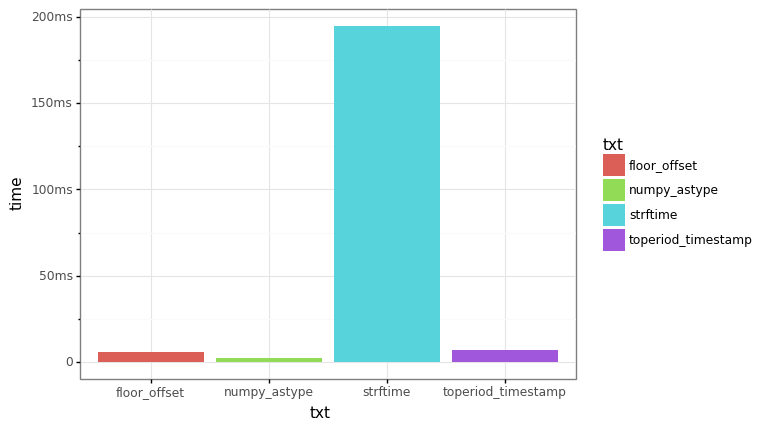

<ggplot: (8758676876353)>

In [ ]:
(
    ggplot(res2, aes('txt', 'time', fill = 'txt')) +
    gg.geom_col() +
    gg.theme_bw()
)

In [ ]:
res.insert(0, 'type', '20k')
res2.insert(0, 'type', '30k')

In [ ]:
total = pd.concat([res, res2], axis = 0)

In [ ]:
total.to_csv('timer.csv')

In [ ]:
import os

In [ ]:
os.getcwd()

'/content'

In [ ]:
a = "d3.assign(month = d3.purchase_date.to_numpy().astype('datetime64[M]'))"
b = "d3.assign(month = d3.purchase_date.dt.to_period('M').dt.to_timestamp())"
c = "d3.assign(month = d3.purchase_date.dt.floor('D') - pd.offsets.MonthBegin())"
d = "d3.assign(month = d3.purchase_date.apply(lambda x : x.strftime('%Y-01-01')))"
txts = [a, b, c]

timers = []

for line in txts :
  print('START : ' + line) 
   
  temp = []

  for x in range(10000) :
    s_time = datetime.now()
    eval(line)
    e_time = datetime.now()  
    t_time = e_time - s_time
    temp.append(t_time)

  timers.append(np.mean(temp))

names = ['numpy_astype', 'toperiod_timestamp', 'floor_offset']
res3 = pd.DataFrame({'txt' : names, 'time' : timers})
res3

START : d3.assign(month = d3.purchase_date.to_numpy().astype('datetime64[M]'))
START : d3.assign(month = d3.purchase_date.dt.to_period('M').dt.to_timestamp())
START : d3.assign(month = d3.purchase_date.dt.floor('D') - pd.offsets.MonthBegin())


,txt,time
0,numpy_astype,0 days 00:00:00.002832
1,toperiod_timestamp,0 days 00:00:00.006691
2,floor_offset,0 days 00:00:00.005975


In [ ]:
d2  = pd.DataFrame({'user_id' : range(1, 7), 
                    'purchase_date' : ["2015-01-23 14:05:21", "2015-02-05 05:07:30", 
                                       "2015-02-18 17:08:51", "2015-03-21 17:07:30", 
                                       "2015-03-11 18:32:56", "2015-03-03 11:02:30"]})

d2.purchase_date = pd.to_datetime(d2.purchase_date)
d2

,user_id,purchase_date
0,1,2015-01-23 14:05:21
1,2,2015-02-05 05:07:30
2,3,2015-02-18 17:08:51
3,4,2015-03-21 17:07:30
4,5,2015-03-11 18:32:56
5,6,2015-03-03 11:02:30


In [ ]:
d2.assign(month = d2.purchase_date.to_numpy().astype('datetime64[M]'))

,user_id,purchase_date,month
0,1,2015-01-23 14:05:21,2015-01-01
1,2,2015-02-05 05:07:30,2015-02-01
2,3,2015-02-18 17:08:51,2015-02-01
3,4,2015-03-21 17:07:30,2015-03-01
4,5,2015-03-11 18:32:56,2015-03-01
5,6,2015-03-03 11:02:30,2015-03-01


In [ ]:
d2.assign(month = d2.purchase_date.dt.to_period('M').dt.to_timestamp())

,user_id,purchase_date,month
0,1,2015-01-23 14:05:21,2015-01-01
1,2,2015-02-05 05:07:30,2015-02-01
2,3,2015-02-18 17:08:51,2015-02-01
3,4,2015-03-21 17:07:30,2015-03-01
4,5,2015-03-11 18:32:56,2015-03-01
5,6,2015-03-03 11:02:30,2015-03-01


In [ ]:
d2.assign(month = d2.purchase_date.dt.floor('D') - pd.offsets.MonthBegin())

,user_id,purchase_date,month
0,1,2015-01-23 14:05:21,2015-01-01
1,2,2015-02-05 05:07:30,2015-02-01
2,3,2015-02-18 17:08:51,2015-02-01
3,4,2015-03-21 17:07:30,2015-03-01
4,5,2015-03-11 18:32:56,2015-03-01
5,6,2015-03-03 11:02:30,2015-03-01


In [ ]:
d2.purchase_date.dt.floor('D')

0   2015-01-23
1   2015-02-05
2   2015-02-18
3   2015-03-21
4   2015-03-11
5   2015-03-03
Name: purchase_date, dtype: datetime64[ns]

In [ ]:
import json
import os

In [ ]:
os.chdir('./sample_data')

In [ ]:
os.listdir()

['README.md',
 'anscombe.json',
 'california_housing_test.csv',
 'california_housing_train.csv',
 'mnist_test.csv',
 'mnist_train_small.csv']

In [ ]:
file_path = "anscombe.json"

with open(file_path, 'r') as file:
    data = json.load(file)
    print(type(data))
    print(data)

<class 'list'>
[{'Series': 'I', 'X': 10.0, 'Y': 8.04}, {'Series': 'I', 'X': 8.0, 'Y': 6.95}, {'Series': 'I', 'X': 13.0, 'Y': 7.58}, {'Series': 'I', 'X': 9.0, 'Y': 8.81}, {'Series': 'I', 'X': 11.0, 'Y': 8.33}, {'Series': 'I', 'X': 14.0, 'Y': 9.96}, {'Series': 'I', 'X': 6.0, 'Y': 7.24}, {'Series': 'I', 'X': 4.0, 'Y': 4.26}, {'Series': 'I', 'X': 12.0, 'Y': 10.84}, {'Series': 'I', 'X': 7.0, 'Y': 4.81}, {'Series': 'I', 'X': 5.0, 'Y': 5.68}, {'Series': 'II', 'X': 10.0, 'Y': 9.14}, {'Series': 'II', 'X': 8.0, 'Y': 8.14}, {'Series': 'II', 'X': 13.0, 'Y': 8.74}, {'Series': 'II', 'X': 9.0, 'Y': 8.77}, {'Series': 'II', 'X': 11.0, 'Y': 9.26}, {'Series': 'II', 'X': 14.0, 'Y': 8.1}, {'Series': 'II', 'X': 6.0, 'Y': 6.13}, {'Series': 'II', 'X': 4.0, 'Y': 3.1}, {'Series': 'II', 'X': 12.0, 'Y': 9.13}, {'Series': 'II', 'X': 7.0, 'Y': 7.26}, {'Series': 'II', 'X': 5.0, 'Y': 4.74}, {'Series': 'III', 'X': 10.0, 'Y': 7.46}, {'Series': 'III', 'X': 8.0, 'Y': 6.77}, {'Series': 'III', 'X': 13.0, 'Y': 12.74}, {'Ser

In [ ]:
s1 = pd.DataFrame(data)
s1.head()

,Series,X,Y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [ ]:
s1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Series  44 non-null     object 
 1   X       44 non-null     float64
 2   Y       44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


In [ ]:
s1.columns = [x.lower() for x in s1.columns]
s1.head()

,series,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [ ]:
s1.series.unique()

array(['I', 'II', 'III', 'IV'], dtype=object)

In [ ]:
s1.groupby('series').agg(['mean', 'std'])

x                   y          
       mean       std      mean       std
series                                   
I       9.0  3.316625  7.500000  2.032890
II      9.0  3.316625  7.500909  2.031657
III     9.0  3.316625  7.500000  2.030424
IV      9.0  3.316625  7.500909  2.030579

In [ ]:
[x for x in map(lambda x : x['Series'], data)]

['I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'II',
 'II',
 'II',
 'II',
 'II',
 'II',
 'II',
 'II',
 'II',
 'II',
 'II',
 'III',
 'III',
 'III',
 'III',
 'III',
 'III',
 'III',
 'III',
 'III',
 'III',
 'III',
 'IV',
 'IV',
 'IV',
 'IV',
 'IV',
 'IV',
 'IV',
 'IV',
 'IV',
 'IV',
 'IV']